In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
import math
%matplotlib inline

# 1. CSV to ARFF

In [2]:
#Since we are using Python, we do  not need to complete this step

# Loading Data

## pandas.read_csv

In [3]:
file_path = "../../data/raw/"

X = pd.read_csv(f"{file_path}x_train_gr_smpl.csv", delimiter=',')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12660 entries, 0 to 12659
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 222.5 MB


In [4]:
# image = X.loc[[600]].values
# image = image[0].reshape((48,48))
# image.shape
# plt.imshow(image)

In [5]:
Y = pd.read_csv(f"{file_path}y_train_smpl.csv", delimiter=',')
Y.columns = ['target']

y0 = pd.read_csv(f"{file_path}y_train_smpl_0.csv", delimiter=',')
y0.columns = ['target']

y1 = pd.read_csv(f"{file_path}y_train_smpl_1.csv", delimiter=',')
y1.columns = ['target']

y2 = pd.read_csv(f"{file_path}y_train_smpl_2.csv", delimiter=',')
y2.columns = ['target']

y3 = pd.read_csv(f"{file_path}y_train_smpl_3.csv", delimiter=',')
y3.columns = ['target']

y4 = pd.read_csv(f"{file_path}y_train_smpl_4.csv", delimiter=',')
y4.columns = ['target']

y5 = pd.read_csv(f"{file_path}y_train_smpl_5.csv", delimiter=',')
y5.columns = ['target']

y6 = pd.read_csv(f"{file_path}y_train_smpl_6.csv", delimiter=',')
y6.columns = ['target']

y7 = pd.read_csv(f"{file_path}y_train_smpl_7.csv", delimiter=',')
y7.columns = ['target']

y8 = pd.read_csv(f"{file_path}y_train_smpl_8.csv", delimiter=',')
y8.columns = ['target']

y9 = pd.read_csv(f"{file_path}y_train_smpl_9.csv", delimiter=',')
y9.columns = ['target']

Y.tail()

,target
12655,9
12656,9
12657,9
12658,9
12659,9


# Create datasets

In [6]:
train_smpl_0 = pd.concat([X, y0], axis=1)
train_smpl_1 = pd.concat([X, y1], axis=1)

In [7]:
train_smpl_2 = pd.concat([X, y2], axis=1)
train_smpl_3 = pd.concat([X, y3], axis=1)

In [8]:
train_smpl_4 = pd.concat([X, y4], axis=1)
train_smpl_5 = pd.concat([X, y5], axis=1)

In [9]:
train_smpl_6 = pd.concat([X, y6], axis=1)
train_smpl_7 = pd.concat([X, y7], axis=1)

In [10]:
train_smpl_8 = pd.concat([X, y8], axis=1)
train_smpl_9 = pd.concat([X, y9], axis=1)

In [11]:
train_smpl = pd.concat([X, Y], axis=1)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


# 2. Data Randomisation

## sklearn.utils.suffle

In [12]:
train_smpl = shuffle(train_smpl, random_state=42)
train_smpl_0 = shuffle(train_smpl_0, random_state=42)
train_smpl_1 = shuffle(train_smpl_1, random_state=42)
train_smpl_2 = shuffle(train_smpl_2, random_state=42)
train_smpl_3 = shuffle(train_smpl_3, random_state=42)
train_smpl_4 = shuffle(train_smpl_4, random_state=42)
train_smpl_5 = shuffle(train_smpl_5, random_state=42)
train_smpl_6 = shuffle(train_smpl_6, random_state=42)
train_smpl_7 = shuffle(train_smpl_7, random_state=42)
train_smpl_8 = shuffle(train_smpl_8, random_state=42)
train_smpl_9 = shuffle(train_smpl_9, random_state=42)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
1236,25.0,24.0,28.0,27.0,24.0,22.0,22.0,22.0,21.0,21.0,...,34.0,33.0,34.0,36.0,35.0,35.0,34.0,34.0,35.0,0
8847,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,241.0,230.0,237.0,227.0,241.0,241.0,239.0,241.0,237.0,5
11285,34.0,34.0,34.0,33.0,32.0,31.0,31.0,30.0,30.0,30.0,...,16.0,14.0,12.0,11.0,11.0,11.0,13.0,17.0,19.0,8
12423,63.0,66.0,70.0,81.0,77.0,72.0,62.0,61.0,60.0,62.0,...,123.0,77.0,47.0,44.0,43.0,42.0,55.0,71.0,68.0,9
10020,38.0,39.0,40.0,50.0,61.0,72.0,93.0,138.0,185.0,233.0,...,62.0,68.0,68.0,81.0,98.0,86.0,73.0,68.0,65.0,6


# class distribution

(array([1410.,    0., 1860.,    0.,  420.,    0.,    0., 1320.,    0.,
        2100.,    0., 2160.,    0.,    0.,  780.,    0.,  240.,    0.,
        2070.,    0.,  300.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        , 3.42857143, 3.85714286,
        4.28571429, 4.71428571, 5.14285714, 5.57142857, 6.        ,
        6.42857143, 6.85714286, 7.28571429, 7.71428571, 8.14285714,
        8.57142857, 9.        ]),
 <a list of 21 Patch objects>)

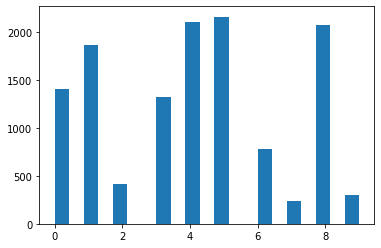

In [13]:
#train_smpl.hist(column='target')
plt.hist(Y['target'], bins='auto')

In [14]:
train_smpl.target.value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: target, dtype: int64

# 3. Reducing the size

#### Because the data runs the data as a Python file, we do not need to reduce the size of our data set. 



In [15]:
train_smpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 1236 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 222.7 MB


In [16]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import make_pipeline

(array([1000.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0.,    0., 1000.,    0., 1000.,    0., 1000.,    0., 1000.,
           0., 1000.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

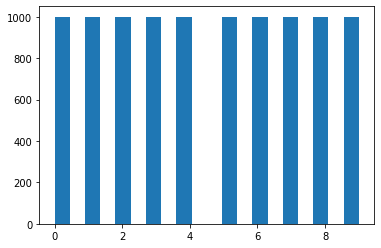

In [17]:

oversample_ratio={2: 1000,  6: 1000, 7: 1000, 9: 1000}
undersample_ratio={0: 1000, 1: 1000,  3: 1000, 4: 1000, 5: 1000, 8: 1000}
pipe = make_pipeline(SMOTE(sampling_strategy=oversample_ratio, n_jobs=7), NearMiss(sampling_strategy=undersample_ratio, n_jobs=7))

X_resampled, y_resampled = pipe.fit_resample(X, Y['target'])
plt.hist(y_resampled, bins='auto')

In [18]:
X_resampled = pd.DataFrame(data=X_resampled)
y_resampled = pd.DataFrame(data=y_resampled)
y_resampled.columns=(['target'])
train_resampled = pd.concat([X_resampled, y_resampled], axis=1)
train_resampled = shuffle(train_resampled, random_state=42)
train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6252 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 175.9 MB


# Test Train Split

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(train_smpl[train_smpl.columns[:2303]], train_smpl['target'], test_size=0.33, random_state=42)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(train_resampled[train_resampled.columns[:2303]], train_resampled['target'], test_size=0.33, random_state=42)
X_train_res_30, X_test_res_30, y_train_res_30, y_test_res_30 = train_test_split(train_resampled[train_resampled.columns[:2303]], train_resampled['target'], test_size=0.528, random_state=42)
X_train_res_70, X_test_res_70, y_train_res_70, y_test_res_70 = train_test_split(train_resampled[train_resampled.columns[:2303]], train_resampled['target'], test_size=0.792, random_state=42)


In [28]:
train_set_res = pd.concat([X_train_res, y_train_res], axis=1, join='inner')
test_set_res = pd.concat([X_test_res, y_test_res], axis=1, join='inner')

train_set_30 = pd.concat([X_train_res_30, y_train_res_30], axis=1, join='inner')
test_set_30 = pd.concat([X_test_res_30, y_test_res_30], axis=1, join='inner')

train_set_70 = pd.concat([X_train_res_70, y_train_res_70], axis=1, join='inner')
test_set_70 = pd.concat([X_test_res_70, y_test_res_70], axis=1, join='inner')

In [29]:
train_resampled.to_pickle("../../data/processed/full_set.pkl")

train_set_res.to_pickle("../../data/processed/train_set.pkl")
test_set_res.to_pickle("../../data/processed/test_set.pkl")

train_set_30.to_pickle("../../data/processed/train_set_30.pkl")
test_set_30.to_pickle("../../data/processed/test_set_30.pkl")

train_set_70.to_pickle("../../data/processed/train_set_70.pkl")
test_set_70.to_pickle("../../data/processed/test_set_70.pkl")

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

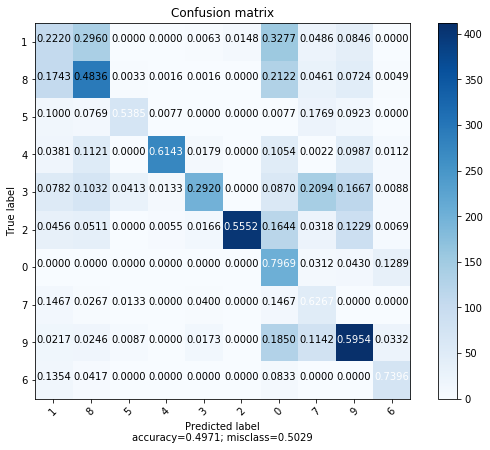

In [32]:
#Original data set
plot_confusion_matrix(conf_mat, target_names=y_test.unique())

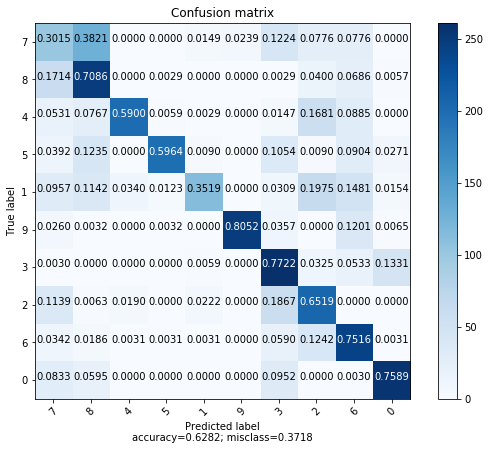

In [33]:
#Resampled data set
plot_confusion_matrix(conf_mat_res, target_names=y_test_res.unique())